In [ ]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#import os

In [ ]:
# Files to load
city_data_to_load = "Resources/city_data.csv"      #120/120 not null
ride_data_to_load = "Resources/ride_data.csv"      #2375/2375 not null

# Read the city data file and store it in a pands DataFrame.
city_data_df = pd.read_csv(city_data_to_load)


# Read the ride data file and store it inb a panda DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)


In [ ]:
#city_data_df.head(10)

In [ ]:
#ride_data_df.head(10)

In [ ]:
# get the columns and the rows that are  not null.
#120/120 not null
city_data_df.count()

In [ ]:
# get the columns and the rows that are not null.
city_data_df.isnull().sum()

In [ ]:
# Get the data types of each column.
city_data_df.dtypes

In [ ]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

In [52]:
# Get the number of data points from the Urban cities.
mylist = [{"Urban":sum(city_data_df["type"]=="Urban")},
{"Rural":sum(city_data_df["type"]=="Rural")},
{"Suburban":sum(city_data_df["type"]=="Suburban")}]
mylist

[{'Urban': 66}, {'Rural': 18}, {'Suburban': 36}]

In [ ]:
# Get the columns and the rows that are not null.
#2375/2375 not null
ride_data_df.count()

In [ ]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

In [48]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [49]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [62]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]           #1625
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]     # 625
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]           # 125
#1625 count
Rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [63]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]



suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [67]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [70]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

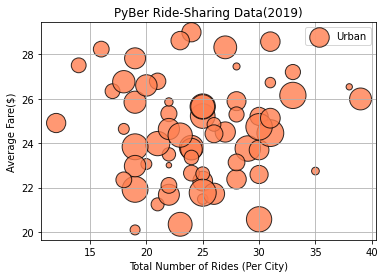

In [80]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, 
            color="Coral", 
            edgecolor="Black", 
            linewidths=1, 
            alpha=0.8, 
            label="Urban")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()



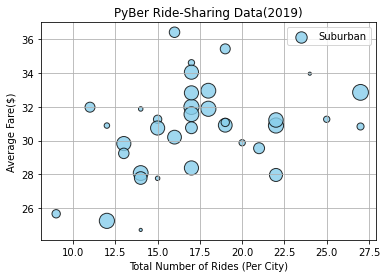

In [83]:
# Build the scatter plots for urban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, 
            color="skyblue", 
            edgecolor="Black", 
            linewidths=1, 
            alpha=0.8, 
            label="Suburban")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()


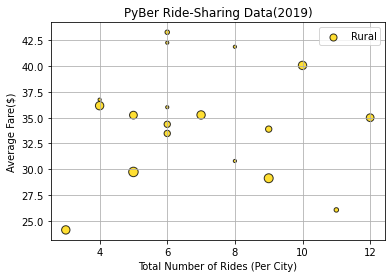

In [85]:
# Build the scatter plots for urban cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, 
            color="gold", 
            edgecolor="Black", 
            linewidths=1, 
            alpha=0.8, 
            label="Rural")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()


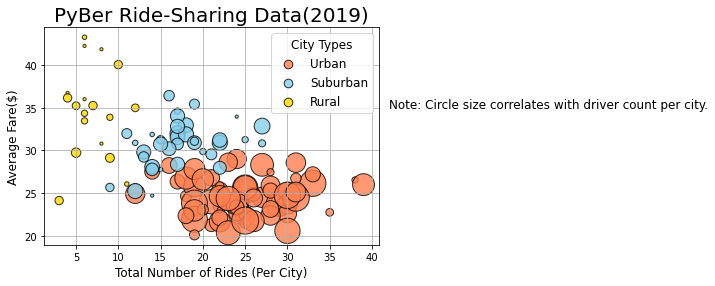

In [97]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, 
            color="Coral", 
            edgecolor="Black", 
            linewidths=1, 
            alpha=0.8, 
            label="Urban")

# Build the scatter plots for urban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, 
            color="skyblue", 
            edgecolor="Black", 
            linewidths=1, 
            alpha=0.8, 
            label="Suburban")

# Build the scatter plots for urban cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, 
            color="gold", 
            edgecolor="Black", 
            linewidths=1, 
            alpha=0.8, 
            label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data(2019)", fontsize=20)
plt.ylabel("Average Fare($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()
